### Data tests
- Data retrieval / editing
- Colour map edge cases (single value field)
- Database write/read
- Static geometry plotting before database load

In [1]:
import lavavu
import numpy
print(lavavu.__file__, lavavu.version)

('/home/owen/Dropbox/LavaVu/lavavu/__init__.pyc', '1.2.44.59-g6e08295')


In [2]:
DIMS = (20,10)
zeros = numpy.zeros(shape=DIMS)
verts = lavavu.grid2d(dims=DIMS)
print(verts.shape)

(10, 20, 2)


In [3]:
#Create a simple test plot with colour bar
lv = None
surf = None
def plot(verts, values, *args, **kwargs):
    global lv, surf
    lv = lavavu.Viewer(background="lightgrey", resolution=(100,100), *args, **kwargs)
    surf = lv.quads("surface", colourmap="diverge")
    surf.colourbar(align="left", font="vector", size=(0.8,0.1), offset=10, position=0, fontscale=0.6)
    surf.vertices(verts)
    surf.values(values) 
    lv.display()


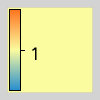

In [4]:
plot(verts, zeros + 1.0)


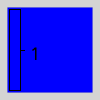

In [5]:
#Test a single value colourmap
surf.colourmap("blue")
lv.display()

In [6]:
#Restore
surf.colourmap("diverge")

"""0.0000=rgba(40,143,208,1)
 0.5000=rgba(251,251,159,1)
 1.0000=rgba(255,117,32,1)
 """

In [7]:
lv.objects
d = lv.objects["surface"].data
print(d)

[GeomData("grid") ==> {'indices': 684, 'default': 200, 'values': 22008, 'vertices': 600, 'normals': 600}]



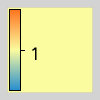

In [8]:
#Get a copy of original values
vals_copy = d.values_copy
#Modify original values
for v in range(vals_copy[0].shape[0]):
    vals_copy[0][v] += (0.01*v)
#Show that originals are un-modified
lv.display()


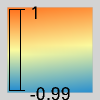

In [9]:
#Modify values in place
vals = d.values
for v in range(vals[0].shape[0]):
    vals[0][v] -= (0.01*v)

#Have to set the range here or change will be undetected
#This is due to caching of ranges to avoid expensive re-calculation
#If we are using this interface we have access to the data in numpy,
#so is easier to manually set our own range rather than try and detect
#Alternative would be a function to invalidate cached range data on an object
surf["range"] = [float(numpy.amin(vals)), float(numpy.amax(vals))]
lv.reload()
lv.display()

In [10]:
lv.objects
d = lv.objects["surface"].data

In [11]:
#Get a copy of vertices, reshape to 3D
vert_copy = d.vertices_copy[0]
vert_copy = vert_copy.reshape((DIMS[1],DIMS[0],-1))
print(vert_copy.shape)

(10, 20, 3)



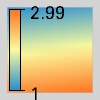

In [12]:
#Plot the modified copies at a new timestep
plot(vert_copy, vals_copy)

In [13]:
#Test export & reload
lv.export()

In [14]:
#Create new viewer
lv = lavavu.Viewer(resolution=(100,100))

['ref_line']



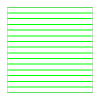

In [15]:
#Plot some static geometry first
my_lines = lv.lines("ref_line", colour="green", linewidth=6.0)
for y in numpy.linspace(0,1,16):
    my_lines.vertices([(0.0, y, 0.0), (1.0, y, 0.0)])

print(lv.objects)
lv.display()


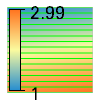

In [16]:
#Load the previously exported data
lv.file("exported.gldb")
print(lv.objects)
lv.display()